Importando o material necessário para realizar o trabalho

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, Sequential
import seaborn as sns
from skimage.transform import resize
from PIL import Image
from math import floor
from sklearn.metrics import precision_recall_curve, roc_curve
import keras


Questão 1

In [91]:
#Guardando o dataset labeled faces in the wild em "dataset"

dataset = fetch_lfw_people(min_faces_per_person=70)

Questão 2

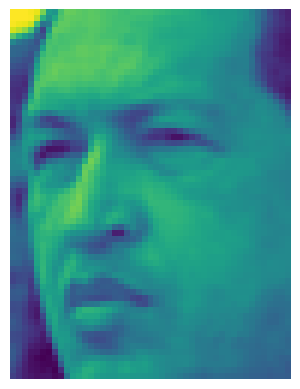

In [141]:
#convertendo as imagens do dataset (dataset.data) para escala de cinza usando PIL da biblioteca Image.

#separa o dataset em X (imagens) e rótulos (y)
X = dataset.images
y = dataset.target

image = X[0].reshape(dataset.images.shape[1:])

#plot antes de transformar para escala de cinza
plt.imshow(image)
plt.axis('off')
plt.show()

In [143]:
#ja que o array que representa as imagens só tem uma dimensão (ja esta vetorizado) e os valors do vetor ja estao normalizados (entre 0 e 1), nao precisa fazer nada

X.shape #para convolução a imagem precisa estar num formato bidimensional

(1288, 62, 47)

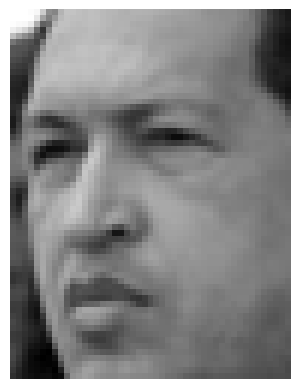

In [144]:
# Exemplo de visualização de uma imagem em escala de cinza

image = X[0].reshape(dataset.images.shape[1:])
plt.imshow(image, 'gray')
plt.axis('off')
plt.show()

Questão 3

In [145]:
#separando a base em treino e teste (80 20) usando train_test_split do sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Questão 4

In [146]:
#definindo a função build que criará a rede neural com as especificações pedidas

def build(v_shape):
    inputs = keras.Input(v_shape)

    x = layers.Conv2D(filters=64, kernel_size=6,  strides=2,padding = 'same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=128, kernel_size=6, strides=2, activation='relu',padding = 'same')(x)
    x = layers.MaxPooling2D(pool_size=2)(x)

    x = layers.Conv2D(filters=256, kernel_size=6, strides=2, activation='relu',padding = 'same')(x)
    x = layers.Flatten()(x)

    outputs = layers.Dense(7, activation='softmax')(x)


    model = keras.Model(inputs=inputs, outputs=outputs)

    model.summary()
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

modelo = build((62, 47, 1))

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 62, 47, 1)]       0         
                                                                 
 conv2d_59 (Conv2D)          (None, 31, 24, 64)        2368      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 15, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 8, 6, 128)         295040    
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 4, 3, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 2, 2, 256)         117

In [147]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#transformando a base de rótulos to_categorical (vetor de 7 posições, uma para cada categoria)
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#ajustando o modelo
history = modelo.fit(X_train, y_train, epochs=1000,
                    validation_split=0.2, callbacks=[callback])

Epoch 1/1000
26/26 [==============================] - 10s 322ms/step - loss: 1.7768 - accuracy: 0.3507 - val_loss: 1.6786 - val_accuracy: 0.4029
Epoch 2/1000
26/26 [==============================] - 9s 352ms/step - loss: 1.7214 - accuracy: 0.3981 - val_loss: 1.6919 - val_accuracy: 0.4029
Epoch 3/1000
26/26 [==============================] - 9s 346ms/step - loss: 1.7078 - accuracy: 0.3981 - val_loss: 1.7157 - val_accuracy: 0.4029
Epoch 4/1000
26/26 [==============================] - 8s 306ms/step - loss: 1.6709 - accuracy: 0.3981 - val_loss: 1.5969 - val_accuracy: 0.4320
Epoch 5/1000
26/26 [==============================] - 9s 349ms/step - loss: 1.5174 - accuracy: 0.4721 - val_loss: 1.4340 - val_accuracy: 0.4806
Epoch 6/1000
26/26 [==============================] - 9s 355ms/step - loss: 1.3082 - accuracy: 0.5073 - val_loss: 1.2747 - val_accuracy: 0.5825
Epoch 7/1000
26/26 [==============================] - 8s 305ms/step - loss: 1.0437 - accuracy: 0.6068 - val_loss: 1.0819 - val_accuracy

Questão 5

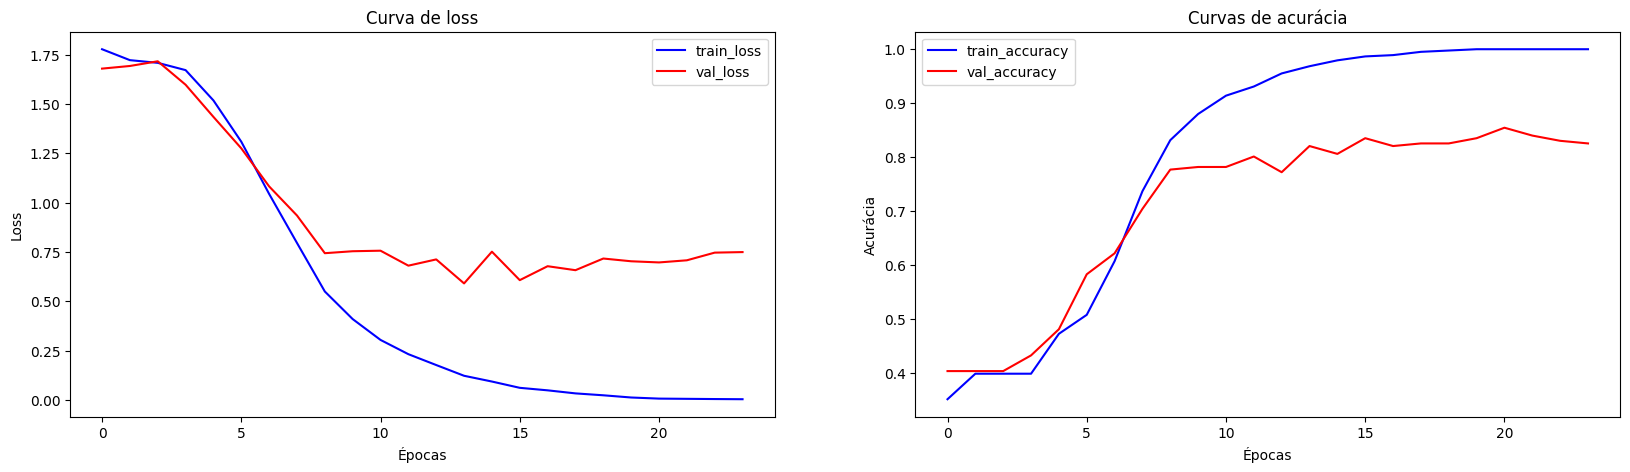

In [148]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

#curvas de loss
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(loss, 'b', label='train_loss')
plt.plot(val_loss, 'r', label='val_loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de loss')
plt.legend()

#curvas de accuracy
plt.subplot(1,2,2)
plt.plot(accuracy, 'b', label='train_accuracy')
plt.plot(val_accuracy, 'r', label='val_accuracy')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Curvas de acurácia')
plt.legend()

plt.show()


Questão 6

In [149]:
#predict na base de teste usando o modelo treinado
pred_prob = modelo.predict(X_test)
X_test.shape

9/9 [==============================] - 0s 29ms/step


(258, 62, 47)

Questão 7

In [150]:
#np.argmax retorna o índice de maior probabilidade de cada um dos vetores to_categorical
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(pred_prob, axis=1)

# calculando a matriz de confusão
cm = confusion_matrix(y_true_labels, y_pred_labels)
print(cm)

[[  8   0   2   1   0   0   0]
 [  0  46   0   1   0   0   0]
 [  2   1  14   3   2   0   0]
 [  1   2   1 111   2   0   2]
 [  0   1   0   0  18   0   0]
 [  0   2   0   0   0  10   1]
 [  1   0   0   0   2   1  23]]


<Axes: >

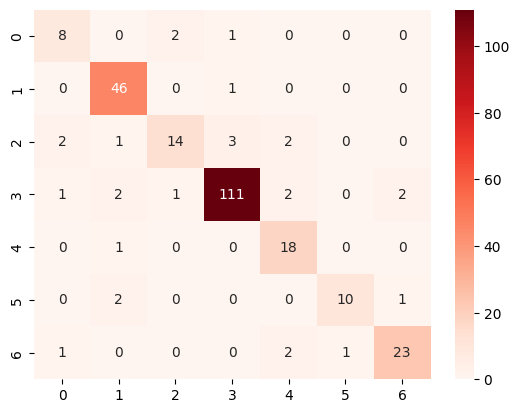

In [151]:
#plotando a matriz de confusão com o heatmap da bilbioteca seaborn

sns.heatmap(cm, annot=True, cmap = 'Reds', fmt = 'd')

Questão 8

In [152]:
#usando a função classification_report do sklearn.metrics
report = classification_report(y_true_labels, y_pred_labels)

print(report)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.88      0.98      0.93        47
           2       0.82      0.64      0.72        22
           3       0.96      0.93      0.94       119
           4       0.75      0.95      0.84        19
           5       0.91      0.77      0.83        13
           6       0.88      0.85      0.87        27

    accuracy                           0.89       258
   macro avg       0.84      0.83      0.83       258
weighted avg       0.89      0.89      0.89       258



Questão 9

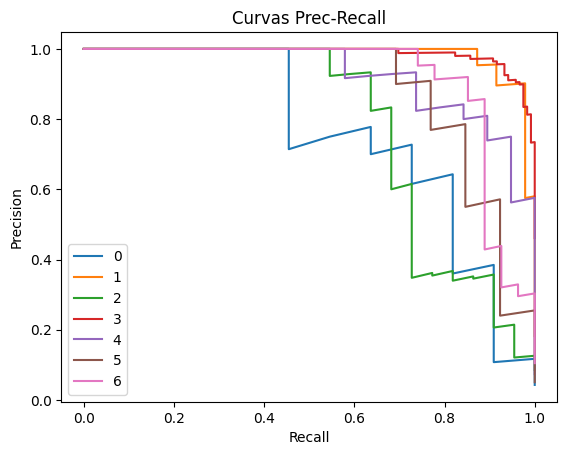

In [153]:
#plotando as curvas prec-recall, uma para cada classe.
for i in range(7):
    precision, recall, _ = precision_recall_curve(y_test[:, i], pred_prob[:, i])
    plt.plot(recall, precision, label=str(i))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Curvas Prec-Recall")
plt.show()

Questão 10

In [170]:
#carregando a imagem baixada e convertendo para escala de cinza, a partir da URL
from PIL import Image
import requests
from io import BytesIO

url = 'https://static.mundoeducacao.uol.com.br/mundoeducacao/2021/07/george-w-bush-em-palanque-para-fazer-discurso.jpg'

response = requests.get(url)
imagem = Image.open(BytesIO(response.content))
imagem = imagem.convert("L")

Questão 11, 12 e 13

h
w


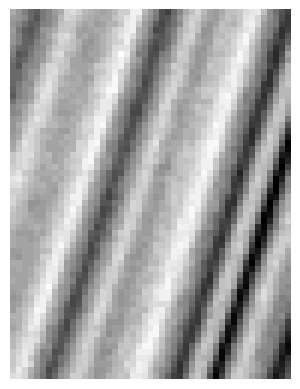

1/1 [==============================] - 0s 41ms/step
Que rosto?  0.39143118 1
w


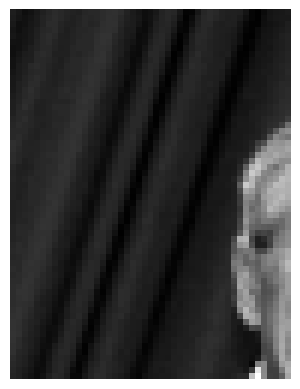

1/1 [==============================] - 0s 37ms/step
Que rosto?  0.6213091 1
w


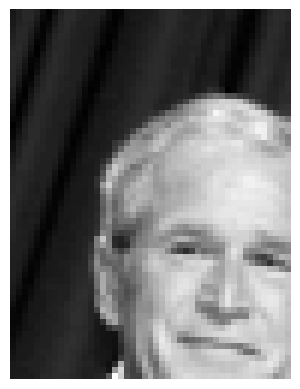

1/1 [==============================] - 0s 35ms/step
Que rosto?  0.5807372 3
w


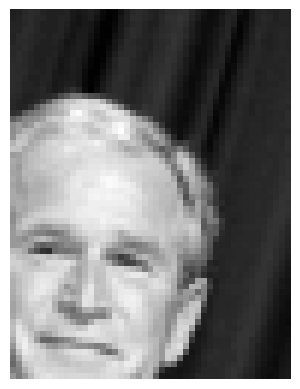

1/1 [==============================] - 0s 37ms/step
Que rosto?  0.9811943 3
w


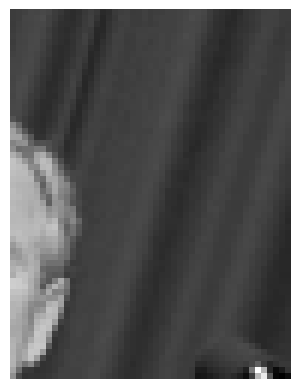

1/1 [==============================] - 0s 46ms/step
Que rosto?  0.5632421 3
w


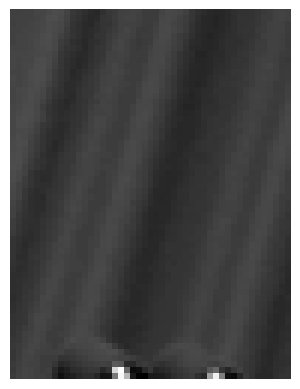

1/1 [==============================] - 0s 34ms/step
Que rosto?  0.29854035 0
w


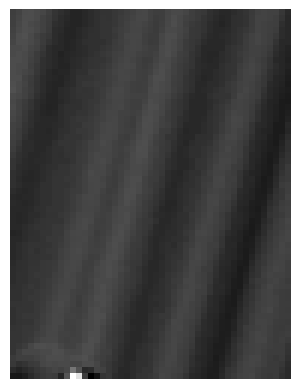

1/1 [==============================] - 0s 41ms/step
Que rosto?  0.5205024 1
w


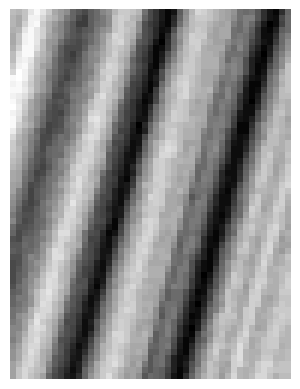

1/1 [==============================] - 0s 35ms/step
Que rosto?  0.5834755 1
h
w


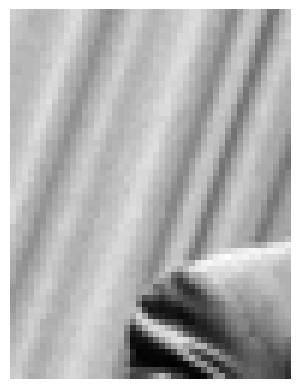

1/1 [==============================] - 0s 36ms/step
Que rosto?  0.38091415 1
w


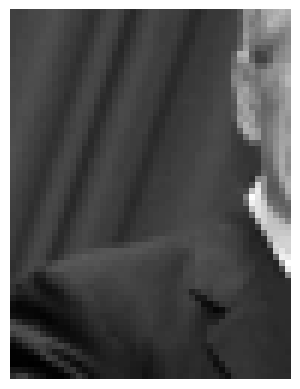

1/1 [==============================] - 0s 36ms/step
Que rosto?  0.9904923 1
w


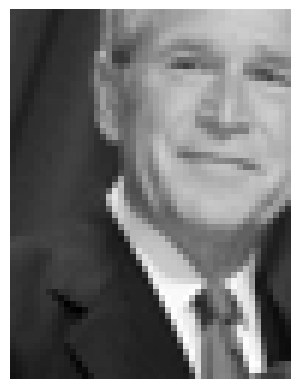

1/1 [==============================] - 0s 42ms/step
Que rosto?  0.9480032 1
w


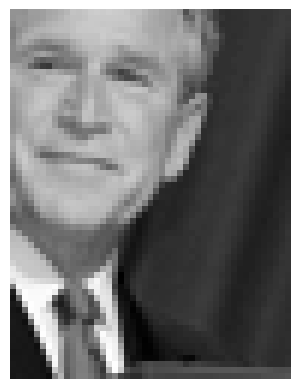

1/1 [==============================] - 0s 39ms/step
Que rosto?  0.7503052 6
w


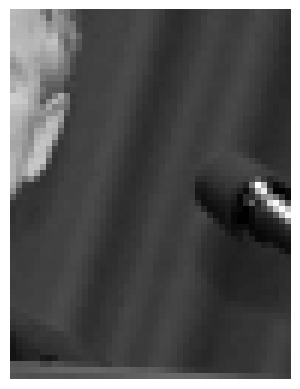

1/1 [==============================] - 0s 46ms/step
Que rosto?  0.9967769 1
w


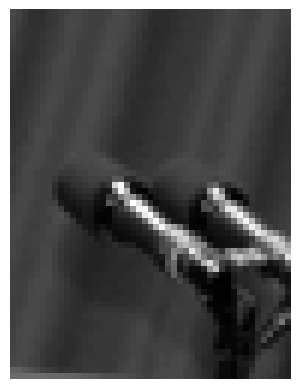

1/1 [==============================] - 0s 37ms/step
Que rosto?  0.9709619 1
w


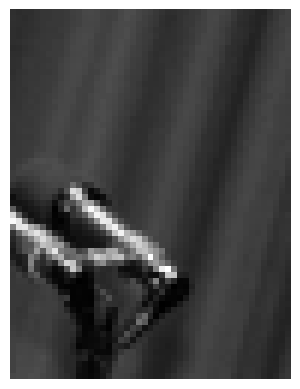

1/1 [==============================] - 0s 38ms/step
Que rosto?  0.8851586 1
w


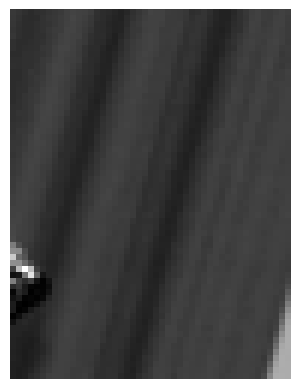

1/1 [==============================] - 0s 42ms/step
Que rosto?  0.8469354 3
h
w


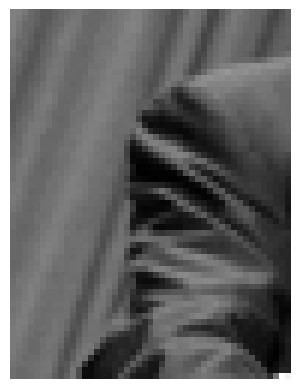

1/1 [==============================] - 0s 39ms/step
Que rosto?  0.49875286 3
w


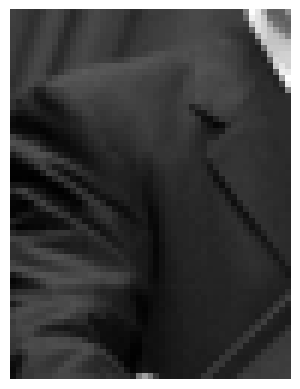

1/1 [==============================] - 0s 40ms/step
Que rosto?  0.8710568 0
w


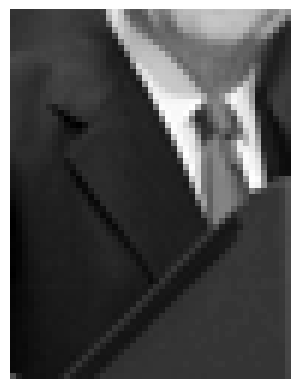

1/1 [==============================] - 0s 42ms/step
Que rosto?  0.87592113 1
w


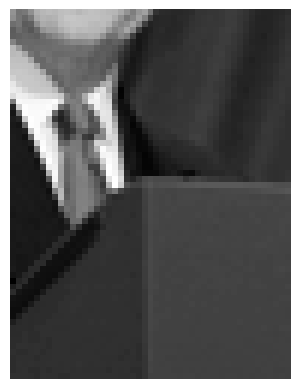

1/1 [==============================] - 0s 38ms/step
Que rosto?  0.97357315 1
w


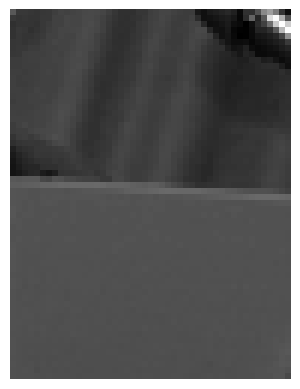

1/1 [==============================] - 0s 41ms/step
Que rosto?  0.63236344 1
w


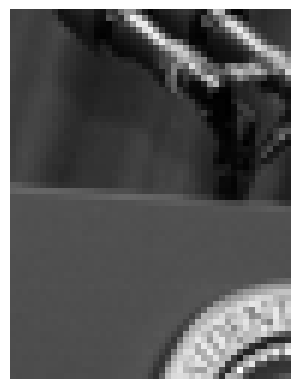

1/1 [==============================] - 0s 37ms/step
Que rosto?  0.86009693 3
w


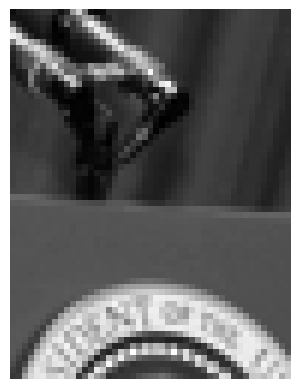

1/1 [==============================] - 0s 42ms/step
Que rosto?  0.6538947 3
w


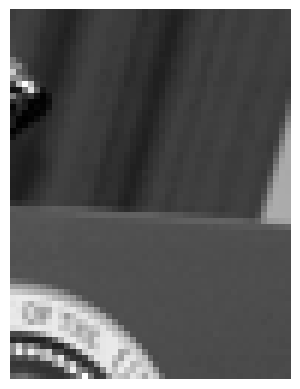

1/1 [==============================] - 0s 47ms/step
Que rosto?  0.9989611 3


In [171]:
#algoritmo de janela deslizante

width, height = imagem.size

stepw, steph = (130/2, 170/2) #definindo cada passo da janela deslizante no eixo x (stepw) e no eixo y (steph), garantindo que haja 50% de sobreposição

best_prob = 0

h = 0
for i in range(floor(height/steph) - 1): #primeiro, percorre a largura para depois percorrer a altura
  w = 0
  print('h')
  for j in range(floor(width/stepw) - 1):
    print('w')
    cropped_image = imagem.crop((w, h, w + 130, h + 170))
    cropped_image = cropped_image.resize((47,62))
    #normaliza e vetoriza a imagem para poder entrar na rede

    vec_image = np.array(cropped_image)

    vec_image = vec_image.reshape(1, 62, 47)/255 #imagem pronta

    #plot antes de transformar para escala de cinza
    image = vec_image.reshape(62, 47)
    plt.imshow(image, "gray")
    plt.axis('off')
    plt.show()

    pred = modelo.predict(vec_image)
    amax_pred = np.amax(pred)
    print("Que rosto? ",amax_pred, np.argmax(pred))

    if((amax_pred > best_prob)): #na base, 3 é o Bush
      best_im = vec_image
      best_prob = amax_pred
      who = np.argmax(pred)

    w = w + stepw

  h = h + steph

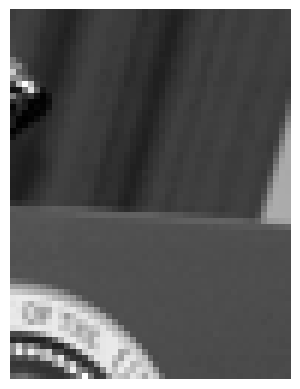

Probabilidade: 0.9989611 quem:  3


In [172]:
image = best_im.reshape(dataset.images.shape[1:])

plt.imshow(image, "gray")
plt.axis('off')
plt.show()

print("Probabilidade:", best_prob, "quem: ", who)